In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.cm as cm
import seaborn as sns
import scipy.cluster.hierarchy as sch
import sklearn.utils

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style('whitegrid')

## **Loading the Data**

In [3]:
input_data = pd.read_csv('/kaggle/input/goodreads-popular-books-dataset/books.csv', sep=',')
print(input_data.shape)
input_data.head()

(1354, 23)


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...


In [4]:
input_data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
book_id,1354.0,4.453580e+03,2.894280e+03,1.000000e+00,1.860250e+03,4.177500e+03,6.814500e+03,9.955000e+03
goodreads_book_id,1354.0,5.951852e+06,6.664595e+06,1.000000e+00,1.537868e+05,3.305318e+06,9.917380e+06,3.207567e+07
best_book_id,1354.0,6.120589e+06,6.935008e+06,1.000000e+00,1.537962e+05,3.422646e+06,1.019388e+07,3.360215e+07
work_id,1354.0,8.707028e+06,9.813696e+06,1.150000e+02,1.375035e+06,4.005716e+06,1.435717e+07,4.963819e+07
books_count,1354.0,5.033000e+01,6.134000e+01,1.000000e+00,2.200000e+01,3.700000e+01,5.800000e+01,1.314000e+03
isbn13,1310.0,9.766700e+12,3.572069e+11,7.678361e+10,9.780152e+12,9.780440e+12,9.780805e+12,9.788424e+12
original_publication_year,1351.0,2.003420e+03,1.678000e+01,1.868000e+03,2.003000e+03,2.008000e+03,2.011000e+03,2.017000e+03
average_rating,1354.0,4.000000e+00,2.200000e-01,3.230000e+00,3.850000e+00,4.000000e+00,4.160000e+00,4.740000e+00
ratings_count,1354.0,9.160429e+04,2.871266e+05,6.221000e+03,1.759325e+04,2.943000e+04,6.073800e+04,4.780653e+06
work_ratings_count,1354.0,9.915569e+04,3.023637e+05,8.833000e+03,1.918150e+04,3.255150e+04,6.681275e+04,4.942365e+06


In [5]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354 entries, 0 to 1353
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    1354 non-null   int64  
 1   goodreads_book_id          1354 non-null   int64  
 2   best_book_id               1354 non-null   int64  
 3   work_id                    1354 non-null   int64  
 4   books_count                1354 non-null   int64  
 5   isbn                       1302 non-null   object 
 6   isbn13                     1310 non-null   float64
 7   authors                    1354 non-null   object 
 8   original_publication_year  1351 non-null   float64
 9   original_title             1302 non-null   object 
 10  title                      1354 non-null   object 
 11  language_code              1245 non-null   object 
 12  average_rating             1354 non-null   float64
 13  ratings_count              1354 non-null   int64

In [6]:
df = pd.DataFrame(input_data, columns=['ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5'])

In [7]:
df.head()

,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,2346404,2478609,140739,47994,92723,327550,698471,1311871
4,1903563,2216814,101023,36315,82870,310297,673028,1114304


In [8]:
corr = df.corr()
corr

,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
ratings_count,1.000000,0.998804,0.833556,0.628012,0.775569,0.934271,0.986080,0.974708
work_ratings_count,0.998804,1.000000,0.848064,0.616818,0.771346,0.935069,0.989575,0.976288
work_text_reviews_count,0.833556,0.848064,1.000000,0.503529,0.699327,0.842354,0.875557,0.792703
ratings_1,0.628012,0.616818,0.503529,1.000000,0.937733,0.762889,0.557000,0.480438
ratings_2,0.775569,0.771346,0.699327,0.937733,1.000000,0.920637,0.743197,0.629462
ratings_3,0.934271,0.935069,0.842354,0.762889,0.920637,1.000000,0.935469,0.837644
ratings_4,0.986080,0.989575,0.875557,0.557000,0.743197,0.935469,1.000000,0.959086
ratings_5,0.974708,0.976288,0.792703,0.480438,0.629462,0.837644,0.959086,1.000000


## **EDA**

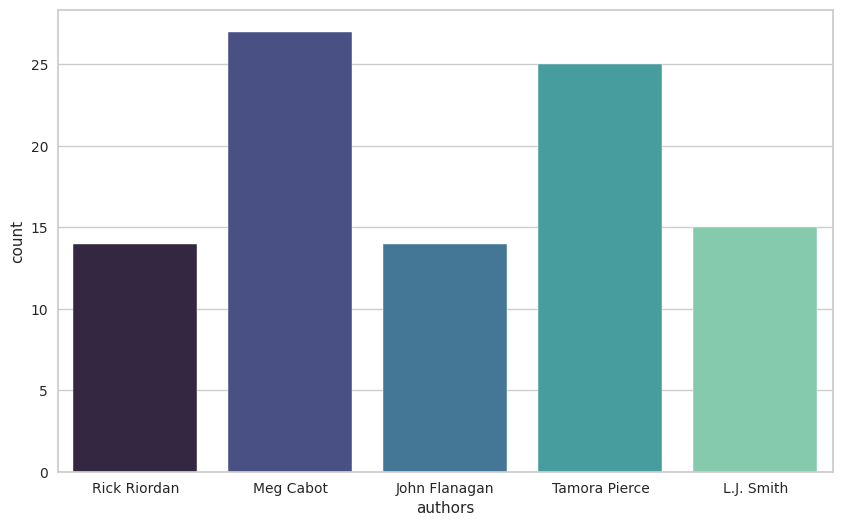

authors
Meg Cabot                27
Tamora Pierce            25
L.J. Smith               15
John Flanagan            14
Rick Riordan             14
                         ..
Nicola Yoon               1
Barry Lyga                1
Annette Curtis Klause     1
Patricia Reilly Giff      1
Maria Dahvana Headley     1
Name: count, Length: 555, dtype: int64

In [9]:
first_five_authors = input_data['authors'].value_counts().index[:5]

filtered_data = input_data[input_data['authors'].isin(first_five_authors)]

# Plotting
plt.figure(figsize=(10, 6)) 
sns.set_style('whitegrid')
sns.countplot(data=filtered_data, x='authors', palette='mako').set
plt.show()
input_data['authors'].value_counts()

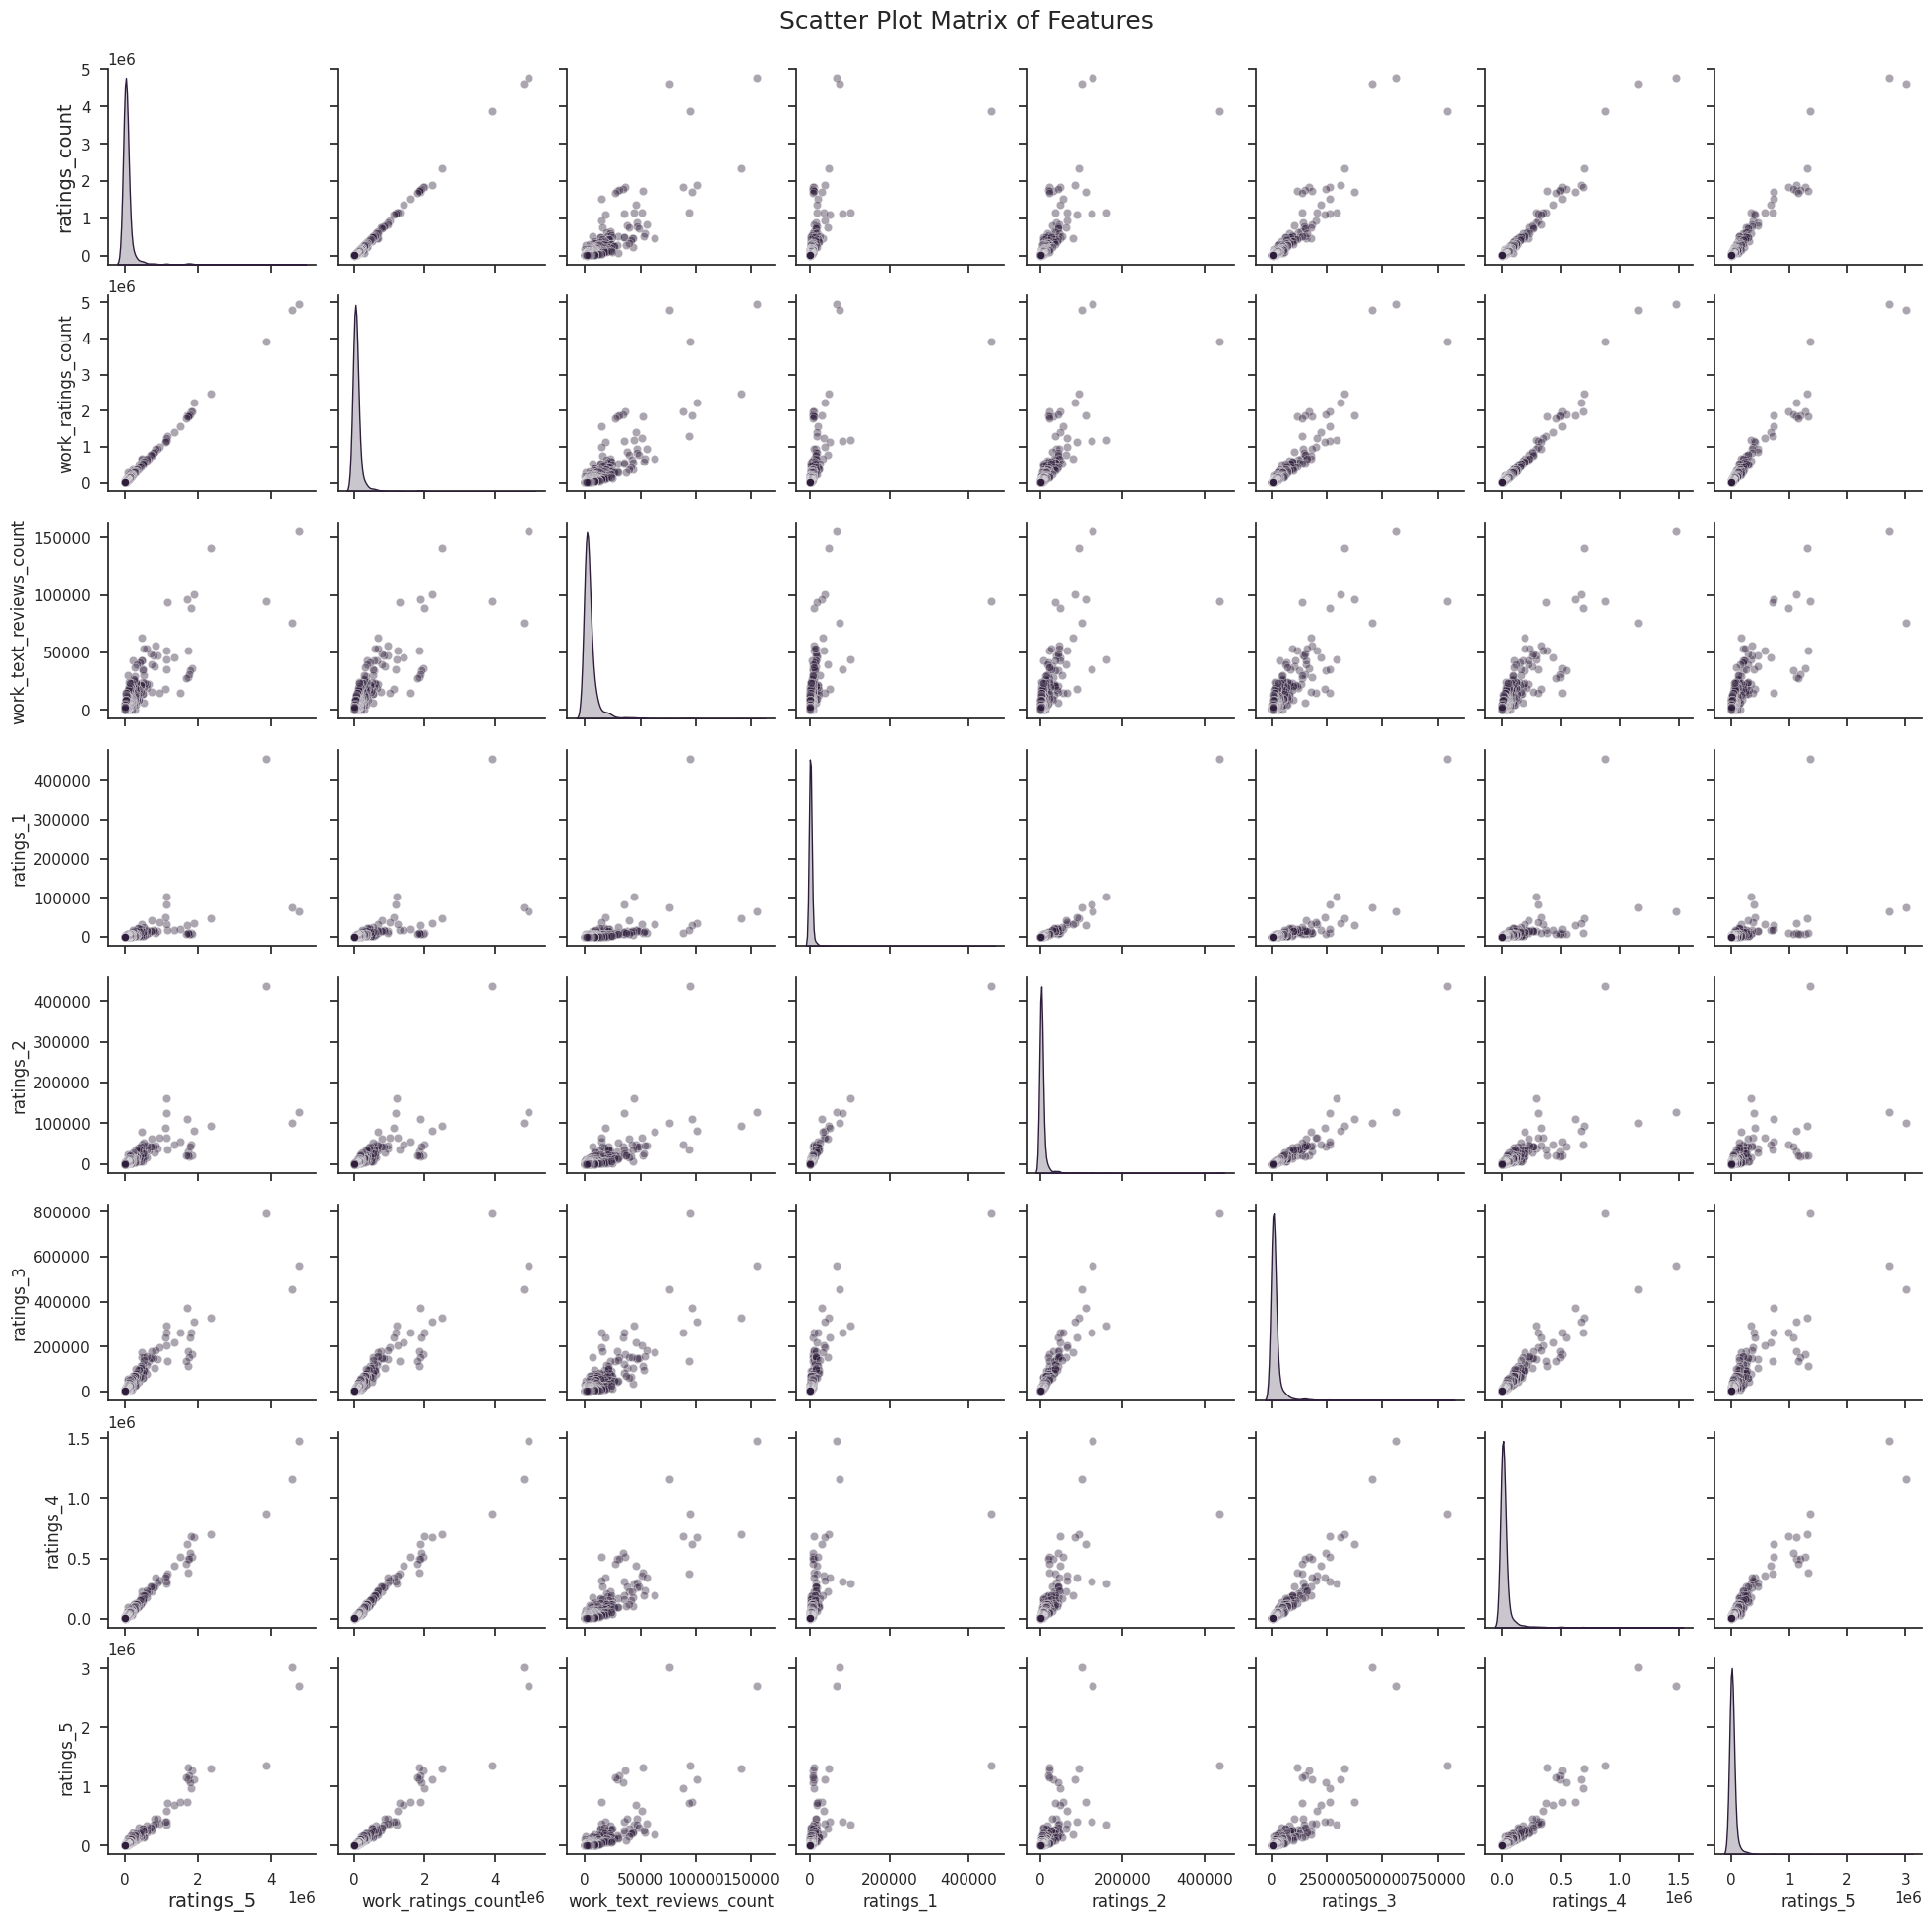

In [10]:
sns.set(style='ticks', palette='mako') 
scatter_matrix = sns.pairplot(df, diag_kind='kde', markers='o', plot_kws={'alpha': 0.4})
plt.subplots_adjust(top=0.95)  
scatter_matrix.fig.suptitle('Scatter Plot Matrix of Features', fontsize=18)  
scatter_matrix.axes[0, 0].set_ylabel(df.columns[0], fontsize=14)  
scatter_matrix.axes[-1, 0].set_xlabel(df.columns[-1], fontsize=14)  
plt.show()

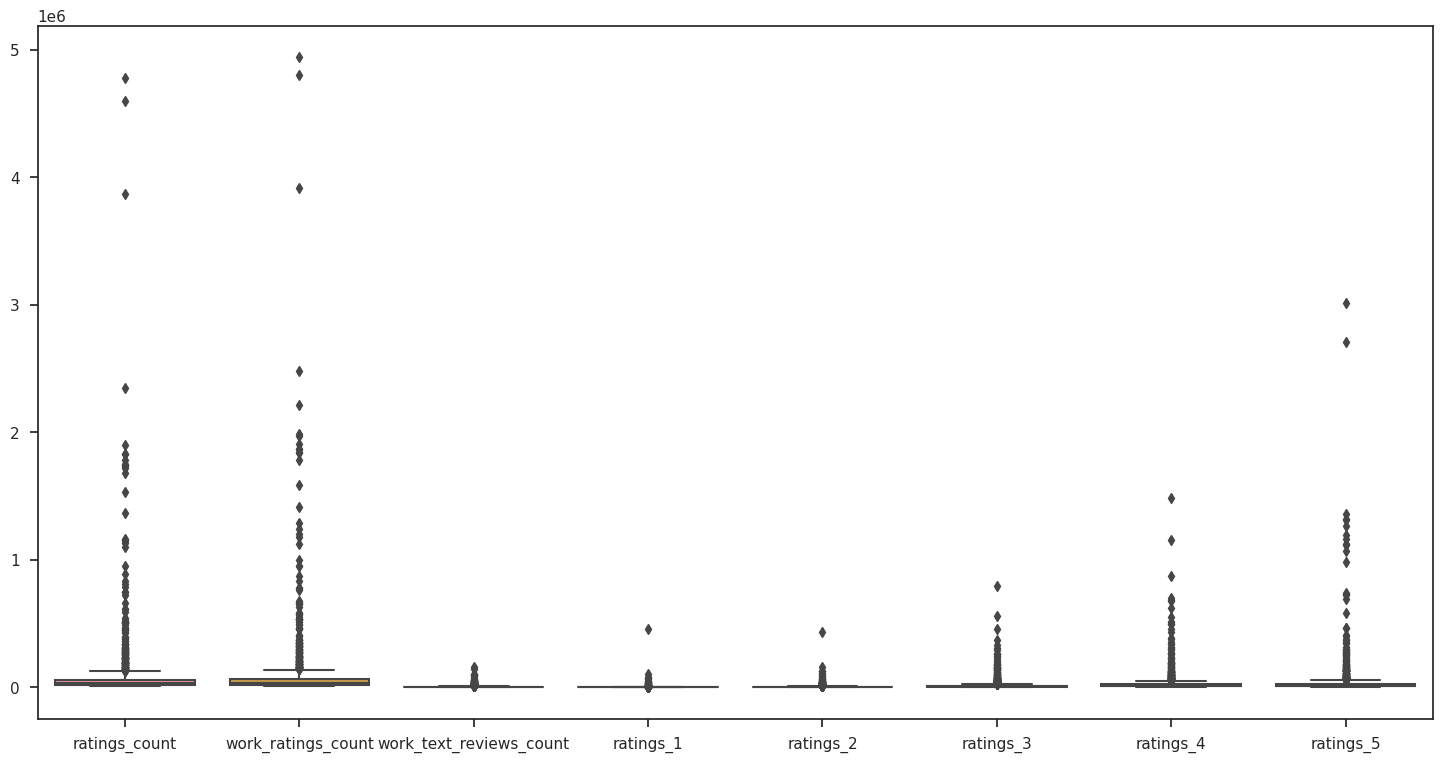

In [11]:
fig = plt.figure(figsize=(18,9))
ax = sns.boxplot(data=df)
plt.show();

## **Data Preprocessing**

In [12]:
# Instantiate the StandardScaler and store in a variable named "scaler".
# .fit_transform() the input_data using your scaler
# Save the results in a new variable named X_scaled 

scaler   = StandardScaler()
X_scaled = scaler.fit_transform(df)

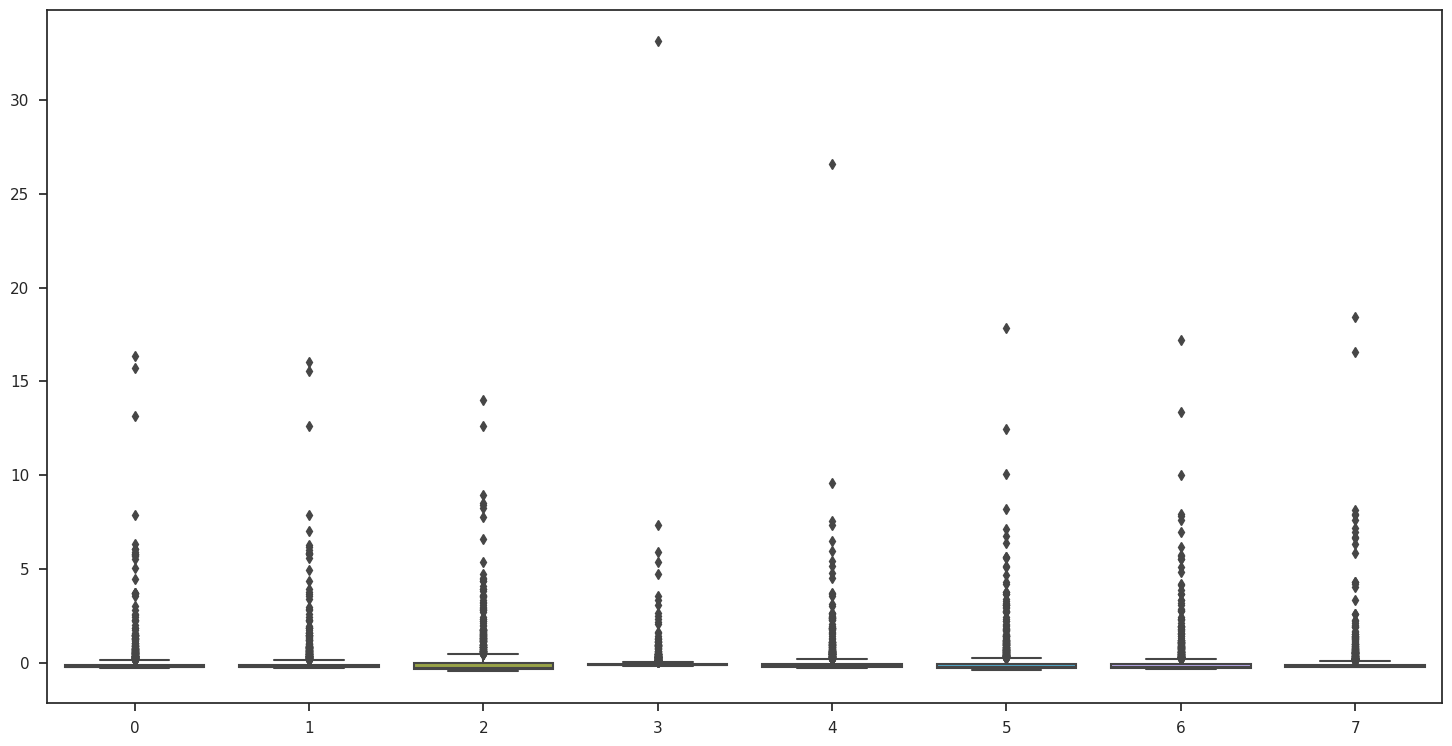

In [13]:
# Boxplot after the scaling

fig = plt.figure(figsize=(18,9))
ax = sns.boxplot(data=X_scaled)
plt.show();

## **Outlier Detection**

In [14]:
for i in list(df.columns):
    
    IQR = np.percentile(df[i],75) - np.percentile(df[i],25)
    
    Outlier_top = np.percentile(df[i],75) + 1.5*IQR
    Outlier_bottom = np.percentile(df[i],25) - 1.5*IQR
    
    df[i] = np.where(df[i] > Outlier_top,Outlier_top,df[i])
    df[i] = np.where(df[i] < Outlier_bottom,Outlier_bottom,df[i])

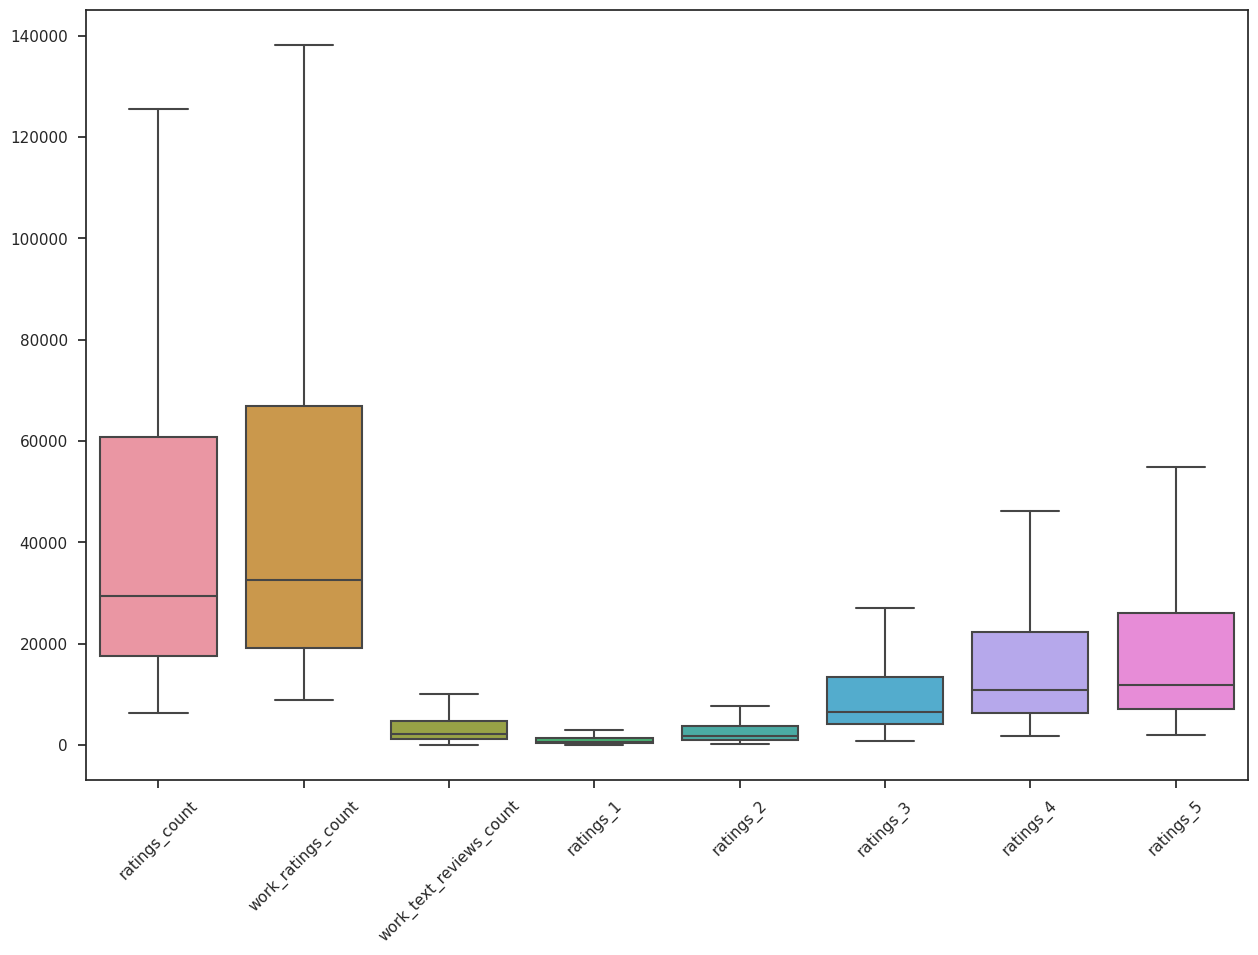

In [15]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df )
plt.xticks(rotation=45) 
plt.show()

## **Clustering Algorithms**

## **K_Means Clustering** 

In [16]:
km = KMeans(n_clusters = 3)
km.fit(X_scaled) 

cluster_assignment = km.labels_
cluster_assignment

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [17]:
df["KMCluster"] = cluster_assignment
df.head(10)

,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,KMCluster
0,125455.125,138259.625,9983.125,2928.5,7644.25,27069.875,46146.75,54837.75,1
1,125455.125,138259.625,9983.125,2928.5,7644.25,27069.875,46146.75,54837.75,1
2,125455.125,138259.625,9983.125,2928.5,7644.25,27069.875,46146.75,54837.75,1
3,125455.125,138259.625,9983.125,2928.5,7644.25,27069.875,46146.75,54837.75,2
4,125455.125,138259.625,9983.125,2928.5,7644.25,27069.875,46146.75,54837.75,2
5,125455.125,138259.625,9983.125,2928.5,7644.25,27069.875,46146.75,54837.75,2
6,125455.125,138259.625,9983.125,2928.5,7644.25,27069.875,46146.75,54837.75,2
7,125455.125,138259.625,9983.125,2928.5,7644.25,27069.875,46146.75,54837.75,2
8,125455.125,138259.625,9983.125,2928.5,7644.25,27069.875,46146.75,54837.75,2
9,125455.125,138259.625,9983.125,2928.5,7644.25,27069.875,46146.75,54837.75,2


**Elbow Method**

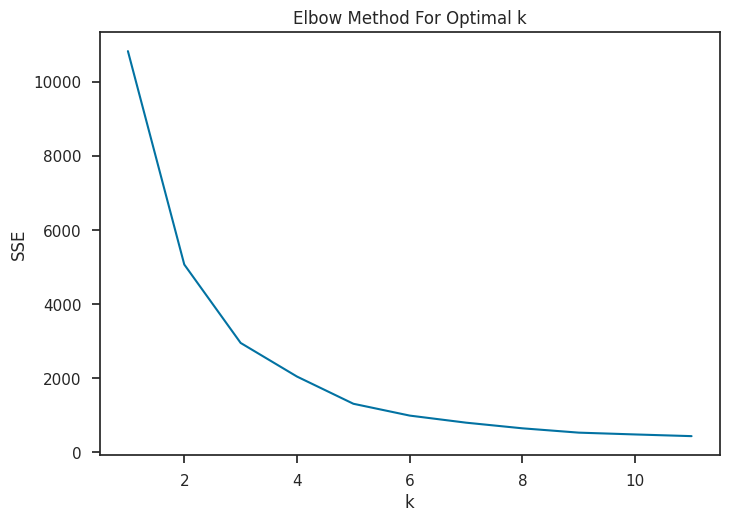

In [18]:
Sum_of_squared_distances = [] 

K = range(1, 12)

for k in K:
    km = KMeans(n_clusters =k, random_state=1)
    km = km.fit(X_scaled)

    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

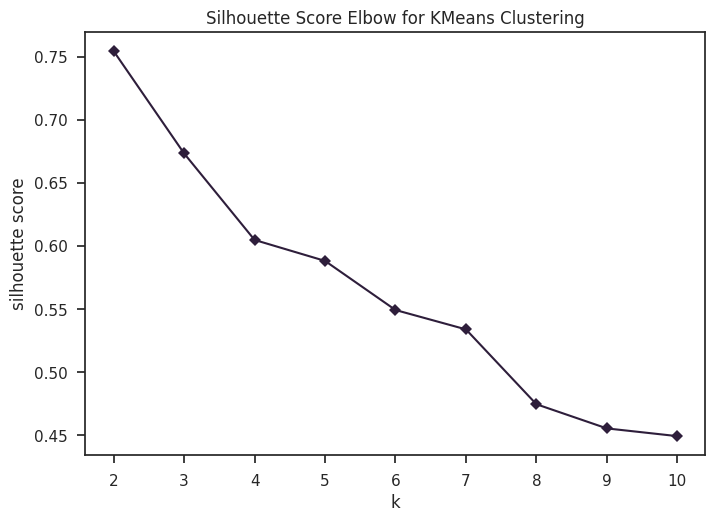

In [19]:
 model = KMeans(random_state=1) 
# model = KMeans() 
visualizer = KElbowVisualizer(model, k=(2, 11), metric='silhouette', timings=False, distance_metric='euclidean', locate_elbow=False)
visualizer.fit(df)    
visualizer.poof()
plt.show();

For n_clusters = 2 The average silhouette_score is : 0.9360928867561569
For n_clusters = 3 The average silhouette_score is : 0.9068553235474126
For n_clusters = 4 The average silhouette_score is : 0.9073549668805485
For n_clusters = 5 The average silhouette_score is : 0.8263919095034344
For n_clusters = 6 The average silhouette_score is : 0.7609635487471756


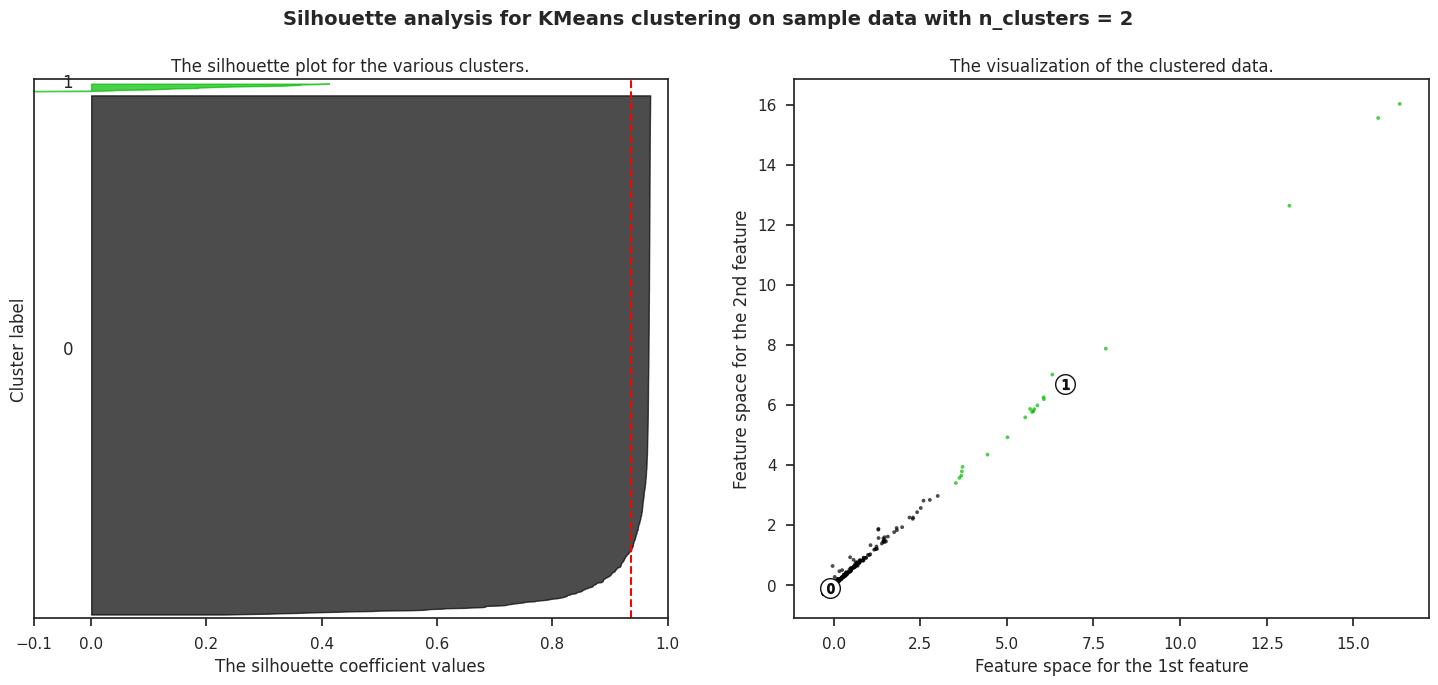

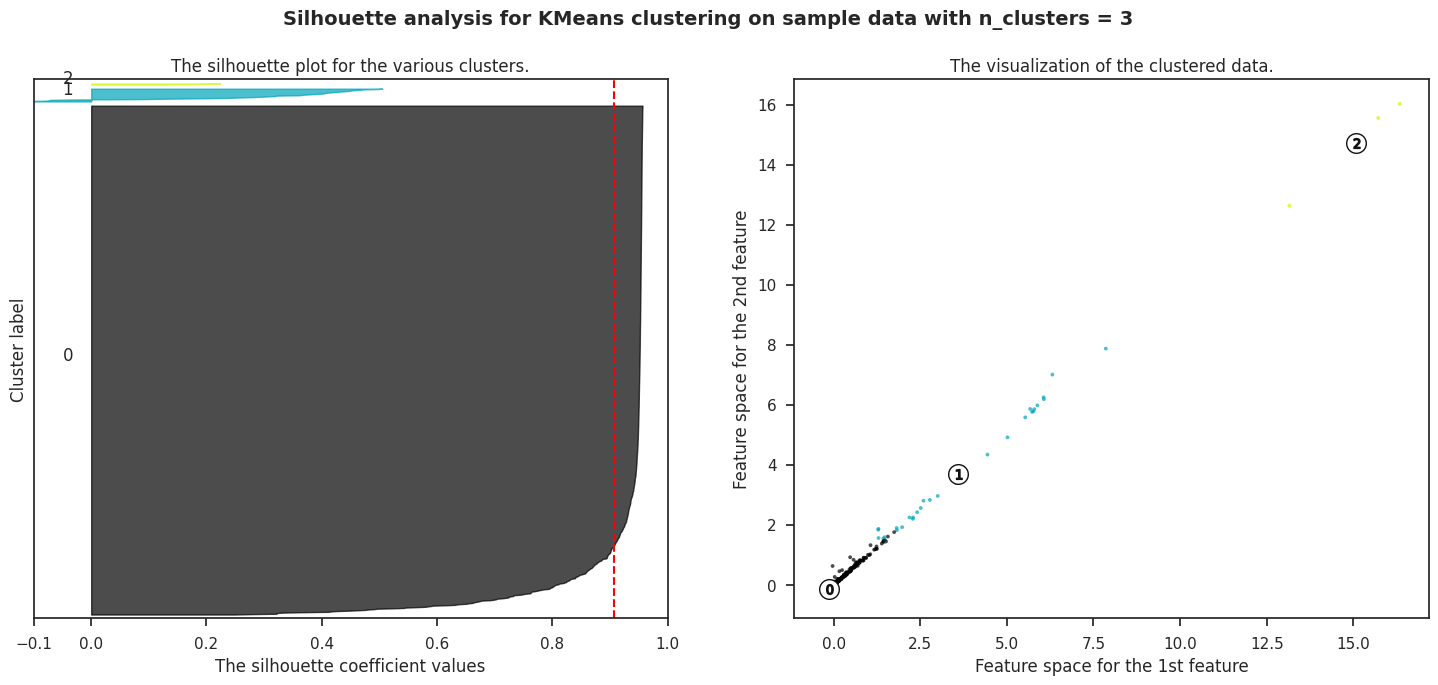

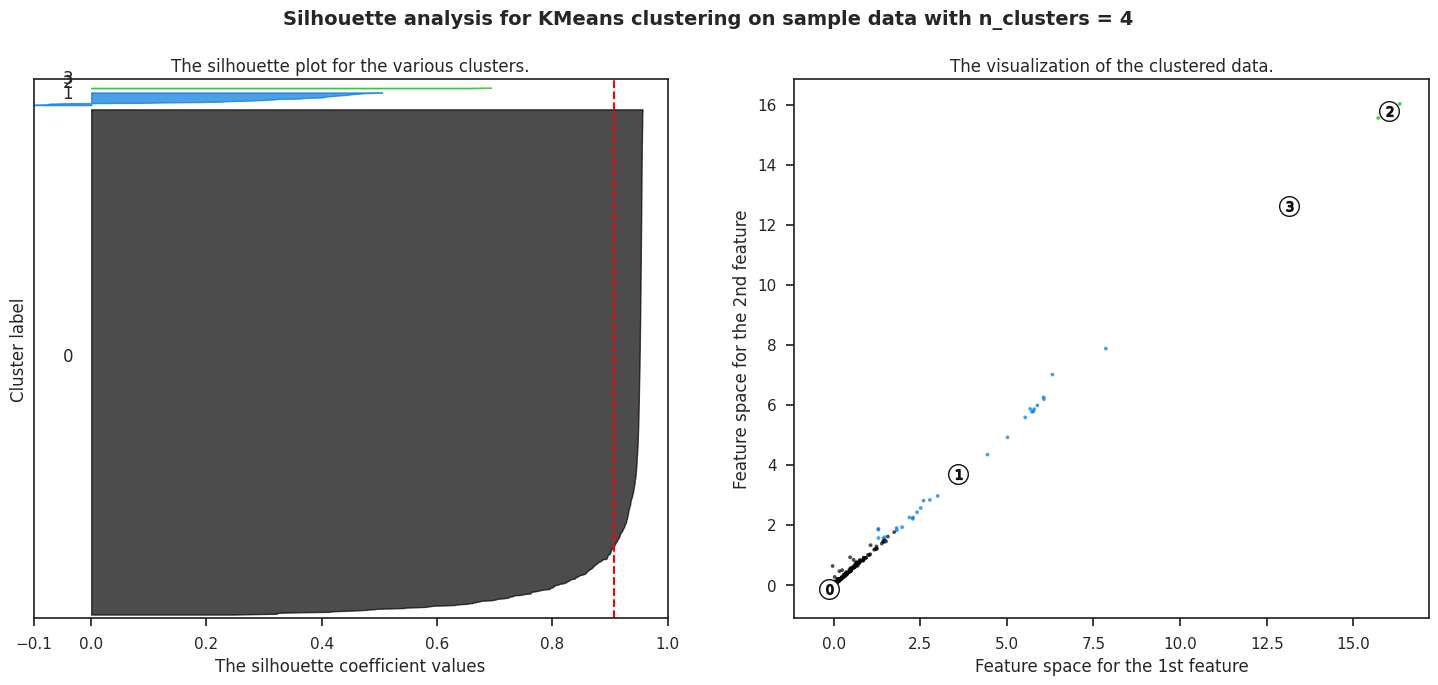

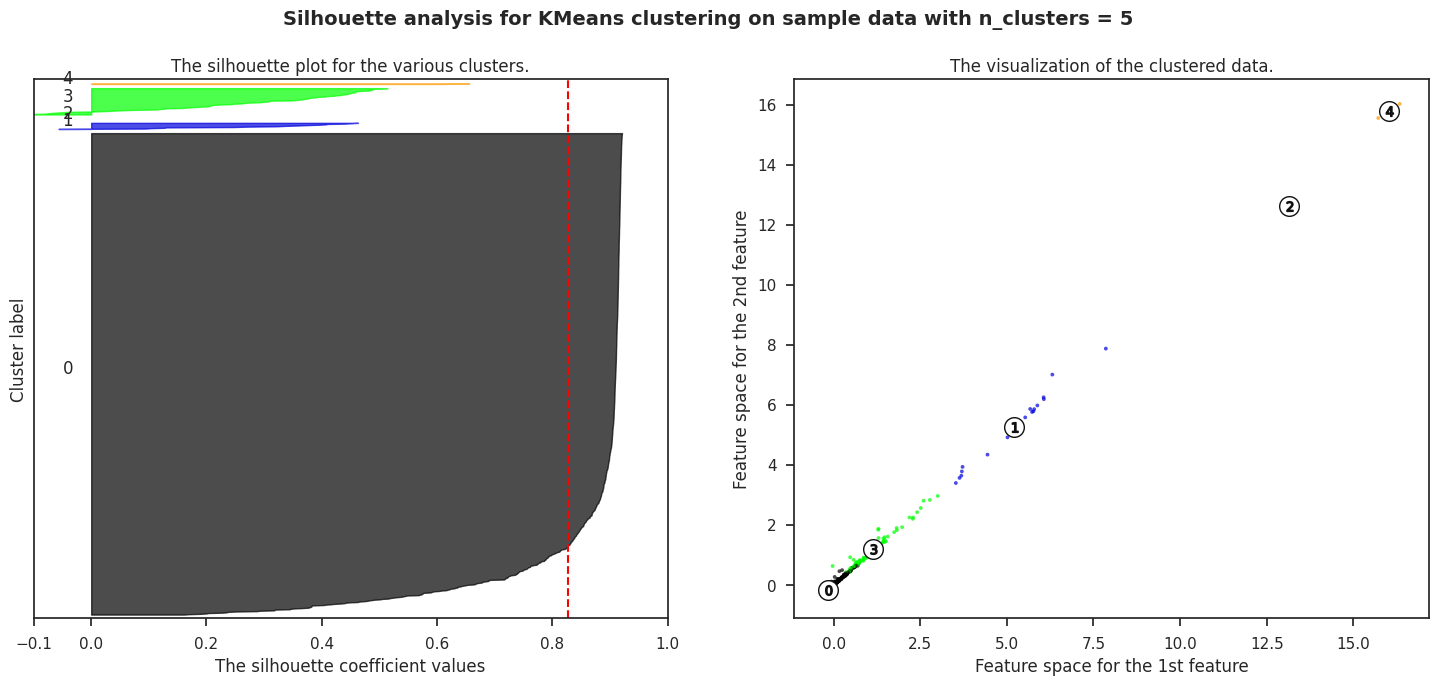

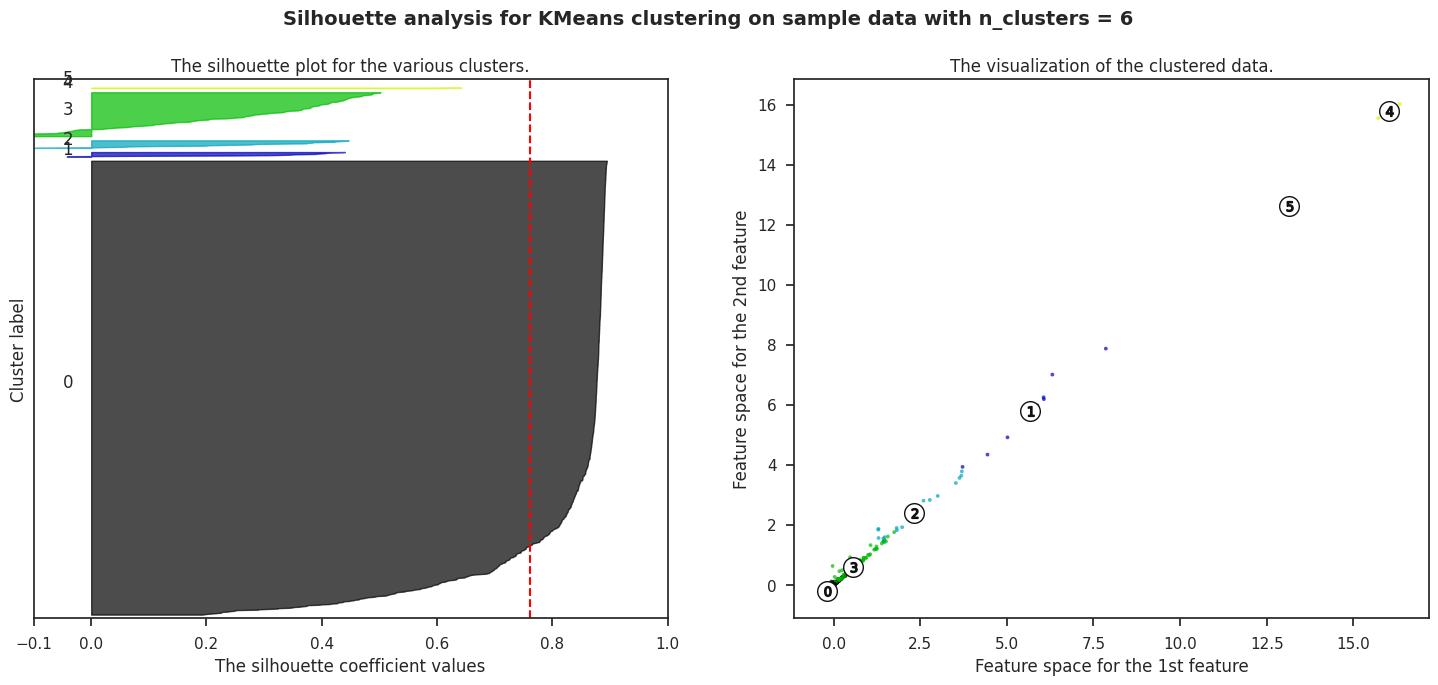

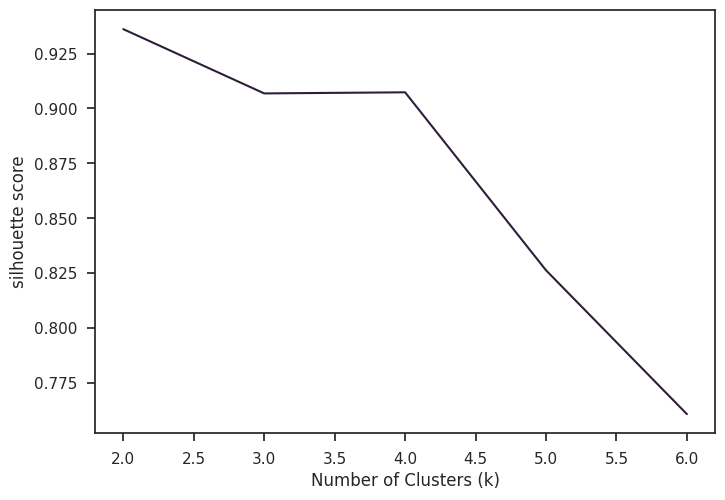

In [20]:
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


#style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

In [21]:
opt_k = 2
kmodel = KMeans(n_clusters=opt_k)
kmodel.fit(X_scaled)
cluster_assignment = kmodel.labels_
cluster_assignment

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [22]:
input_data["KMCluster"] = cluster_assignment
input_data.head(10)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,KMCluster
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,1
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,1
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,1
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...,1
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...,1
5,17,6148028,6148028,6171458,201,439023491,9.780439e+12,Suzanne Collins,2009.0,Catching Fire,...,1988079,88538,10492,48030,262010,687238,980309,https://images.gr-assets.com/books/1358273780m...,https://images.gr-assets.com/books/1358273780s...,1
6,18,5,5,2402163,376,043965548X,9.780440e+12,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban,...,1969375,36099,6716,20413,166129,509447,1266670,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...,1
7,20,7260188,7260188,8812783,239,439023513,9.780439e+12,Suzanne Collins,2010.0,Mockingjay,...,1870748,96274,30144,110498,373060,618271,738775,https://images.gr-assets.com/books/1358275419m...,https://images.gr-assets.com/books/1358275419s...,1
8,21,2,2,2809203,307,439358078,9.780439e+12,"J.K. Rowling, Mary GrandPré",2003.0,Harry Potter and the Order of the Phoenix,...,1840548,28685,9528,31577,180210,494427,1124806,https://images.gr-assets.com/books/1387141547m...,https://images.gr-assets.com/books/1387141547s...,1
9,23,15881,15881,6231171,398,439064864,9.780439e+12,"J.K. Rowling, Mary GrandPré",1998.0,Harry Potter and the Chamber of Secrets,...,1906199,34172,8253,42251,242345,548266,1065084,https://images.gr-assets.com/books/1474169725m...,https://images.gr-assets.com/books/1474169725s...,1


In [23]:
kmodel.cluster_centers_

array([[-0.10014646, -0.10038263, -0.08128407, -0.05751357, -0.075483  ,
        -0.09189698, -0.09865688, -0.09946116],
       [ 6.67976866,  6.69552117,  5.42164736,  3.83615539,  5.03471608,
         6.12952863,  6.5804138 ,  6.63405949]])

In [24]:
tsne = TSNE(n_components=2, verbose=1, perplexity=48)
tsne_results = tsne.fit_transform(df)
df['t-SNE-one'] = tsne_results[:,0]
df['t-SNE-two'] = tsne_results[:,1]

[t-SNE] Computing 145 nearest neighbors...
[t-SNE] Indexed 1354 samples in 0.002s...
[t-SNE] Computed neighbors for 1354 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1354
[t-SNE] Computed conditional probabilities for sample 1354 / 1354
[t-SNE] Mean sigma: 3.823476
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.841221
[t-SNE] KL divergence after 1000 iterations: 0.440210


<Axes: xlabel='t-SNE-one', ylabel='t-SNE-two'>

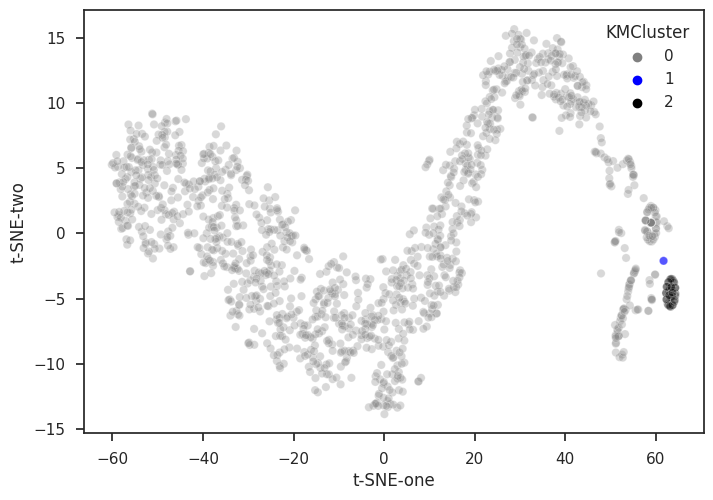

In [25]:
sns.scatterplot(x="t-SNE-one", y="t-SNE-two",    hue="KMCluster",    
                palette=sns.color_palette(["grey","blue","black"]),    
                data=df,    legend="full",    alpha=0.3)